<div style="display:flex; align-items:center; gap:10px;">
  <img src="assets\ece_logo.png" width="198" height="91" alt="ECE logo" />
</div>

# **Rapport de projet – Analyse de données et apprentissage automatique**
## Réalisé par les étudiants de B3 Data & IA :
## _Kenza BELALOUI - Anis FETOUAB - Nathan BRUNET - Oleksandr KSHYVNYAK - Sirine BESSOUS_

### Ce projet a pour objectif de conduire un pipeline complet d’analyse de données, depuis le choix du dataset jusqu’à l’application d’un ou plusieurs modèles de machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi
from matplotlib.patches import Patch
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

# Partie 1 – Définition du sujet et choix du dataset
## 1.1 Thématique

Notre projet se situe dans le domaine du sport, plus précisément l'analyse de données dans le football.

L'objectif est de créer un modèle d'apprentissage automatique (machine learning) pour prédire si un joueur est un "Top Attaquant". Pour définir cette variable cible (TopAttacker), nous avons identifié les joueurs qui sont au-dessus de la médiane (la moyenne statistique) en GCA (Actions créant un but) et SCA (Actions créant un tir).

Ce sujet mélange nos deux passions : le football et l'application concrète de la data science. Le défi était d'utiliser des statistiques avancées (au-delà des simples buts) pour modéliser une notion qui est d'habitude subjective.

Ce projet sert concrètement au secteur sportif (clubs, médias) :

1.	Aide au recrutement : Les clubs peuvent utiliser le modèle pour repérer des talents sous-évalués, en se basant sur des métriques avancées comme les GCA et SCA.
2.	Analyse de performance : Les entraîneurs peuvent évaluer la contribution réelle d'un joueur à l'attaque, même s'il ne marque pas beaucoup.
3.	Médias et fans : Il fournit une base analytique pour comparer les joueurs et enrichir les débats.


## 1.2 Recherche et sélection du dataset
### Informations générales sur le dataset :

Nom du dataset : 2022-2023 Football Player Stats <br>
Source et lien d’accès : [source](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats) <br>
Auteur ou organisation : Vivo Vinco <br>
Taille (nombre de lignes et de colonnes) : 2690 lignes et 97 colonnes <br>
Format du fichier (CSV, JSON, Excel, etc.) : Fichier en .CSV <br>

### Vérification de la qualité :
Le dataset est-il récent ?
Les variables sont-elles clairement nommées et documentées ?
Contient-il suffisamment de données (au moins plusieurs centaines de lignes) ?
Le dataset comporte-t-il une variable cible que vous pourrez prédire ou expliquer ?
Les données semblent-elles complètes et cohérentes ?

### Justification du choix :
Le fichier était idéal car il contenait les stats de GCA (Actions créant un But) et SCA (Actions créant un Tir). C'est crucial, car ces deux métriques nous ont permis de construire la variable cible (TopAttacker). Le reste des données (passes progressives, tirs, etc.) a servi de features (variables explicatives) pour entraîner le modèle.

#### Avantages

Richesse : Le dataset est hyper complet, avec des dizaines de métriques avancées comme PasProg (Passes Progressives) et CarProg (Portées Progressives), ce qui donne une description très fine du profil de chaque joueur.

- Comparabilité : Toutes les données sont ramenées "par 90 minutes" (90s), ce qui garantit une comparaison équitable entre les joueurs, peu importe leur temps de jeu total.

- Qualité : Les performances sont issues d'une compétition de haut niveau (Ligue des Champions), ce sont donc des données très pertinentes.

#### Limites et Difficultés

Nettoyage Technique : Le CSV a demandé un gros travail de preprocessing. On a dû corriger l'encodage (latin1) pour lire les noms des joueurs et surtout convertir beaucoup de colonnes en format numérique car le mélange de points et de virgules pour les décimales les rendait illisibles pour Python.

Données Manquantes : Certaines lignes avaient des valeurs nulles (NaN). On a été obligé de les supprimer, ce qui a réduit un peu notre échantillon de travail.

Déséquilibre des Classes : Le plus gros problème, c'est que nous avions peu de vrais "Top Attaquants" (classe 1) par rapport aux autres joueurs (classe 0). Ce dataset déséquilibré rend la tâche plus dure pour le modèle et nous oblige à utiliser des métriques plus solides que la simple accuracy.

## 1.3 Validation du dataset

### Résultats du Modèle KNN (Test Set)

| **Critères**      | **Questions**                                                  | **Réponses** | **Détail/Justification**                                                                                                                                                                           |
|:------------------|:---------------------------------------------------------------|:-------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Pertinence**    | Le dataset permet-il de répondre à votre question de départ ?  | OUI          | Oui, le dataset est pertinent car il contient les métriques fines et granulaires nécessaires pour quantifier et classifier la performance des attaquants.                                          |
| **Clarté**        | Les variables sont-elles bien nommées et compréhensibles ?     | NON          | Les variables sont lisibles mais nécessitent un renommage pour passer des abréviations anglaises techniques (SCA, CarProg) à une nomenclature française claire pour le rapport.                    |
| **Propreté**      | Les données semblent-elles utilisables sans nettoyage majeur ? | NON          | Les données nécessitent un nettoyage sélectif majeur car il faut filtrer les lignes (joueurs non attaquants) et les colonnes (statistiques non pertinentes) pour garantir la pertinence du modèle. |
| **Taille**        | Le dataset est-il d’une taille adaptée à votre analyse ?       | OUI          | Avec 2689 lignes initiales, le dataset est d'une taille adaptée pour une classification par Machine Learning, même après le filtrage des lignes non pertinentes.                                   |
| **Accessibilité** | Le format est-il compatible avec Python (CSV, XLSX) ?          | OUI          | Le format CSV est parfaitement compatible avec les librairies d'analyse Python, notamment Pandas, via pd.read_csv.                                                                                 |
| **Actualité**     | Les données sont-elles récentes ou encore valides ?            | OUI          | Les données sont valides et récentes, car l'horodatage du fichier CSV (2022-2023-football-player-stats.csv) indique la saison 2022-2023, les rendant actuelles pour une analyse en Data Science.   |

# Partie 2 – Exploration initiale des données
## 2.1 Chargement et aperçu du dataset (Importez le dataset dans un notebook Python à l’aide de pandas. )

#### Comment le dataset a-t-il été chargé ?

On a utilisé la bibliothèque **pandas** pour lire le fichier 2022-2023-football-player-stats.csv. La commande clé était :

`df = pd.read_csv(csv_path, sep=';', decimal=',', index_col='Rk', encoding='latin1')`

L'astuce a été de spécifier sep=';' (point-virgule) et decimal=',' (virgule) pour le format européen, et surtout encoding='latin1' pour éviter les erreurs de lecture de caractères spéciaux dans les noms de joueurs.

##### Nombre de lignes et de colonnes

Après le chargement, le DataFrame contenait un certain nombre de lignes (joueurs) et de colonnes (statistiques). Ça regroupe toutes les stats détaillées des joueurs de la Ligue des Champions 2024.

##### Principales variables (Features) clés

- Statistiques de but : Goals (buts marqués), Shots (tirs), SoT (tirs cadrés).
- Ratios : SoT% (pourcentage de tirs cadrés) et G/Sh, G/SoT (efficacité du tir).
- Métriques de Créativité (les plus importantes) : GCA, SCA, PasProg (Passes Progressives) et CarProg (Portées Progressives). C'est sur ces dernières qu'on a basé notre classification.
- Temps de jeu : 90s, qui est le temps total joué ramené à des matchs complets de 90 minutes.

##### Gestion des valeurs manquantes / incohérences

Nous avons dû gérer des valeurs manquantes (NaN) et des valeurs infinies (inf) dans certaines colonnes, notamment dans les ratios comme G/SoT. Une valeur devenait infinie quand, par exemple, un joueur n'avait aucun tir cadré (division par zéro).
Pour nettoyer ça et garantir la cohérence des données avant de modéliser, on a appliqué deux étapes :
<ol>
<li>Remplacer toutes les valeurs infinies par NaN (valeur manquante) : df.replace([np.inf, -np.inf], np.nan, inplace=True)</li>
<li>Remplacer ces NaN dans la colonne G/SoT par la médiane de la colonne (une valeur centrale) : df_filtered['G/SoT'] = df_filtered['G/SoT'].fillna(df_filtered['G/SoT'].median())</li>
</ol>

In [2]:
df = pd.read_csv('dataset/2022-2023-football-player-stats.csv', sep=';')
df_attaquants = df[
    (df['Pos'].str.contains('FW', na=False)) &
    (df['Min'] >= 300)
    ].copy()

print(f"Dataset initial : {df.shape}")
print(f"Dataset filtré (Attaquants) : {df_attaquants.shape}")

Dataset initial : (2689, 124)
Dataset filtré (Attaquants) : (581, 124)


## 2.2 Typologie des données Classification des variables

__Quantitatives continues :__ Ce sont principalement les ratios ou les données lissées par le temps de jeu, comme le SoT% (précision), G/Sh (efficacité du tir), ShoDist (distance moyenne de tir) et le temps de jeu 90s.

**Quantitatives discrètes :** Les décomptes bruts qui sont des nombres entiers, comme Goals, Shots, les métriques de créativité GCA et SCA, ainsi que PasProg et CarProg (passes et portées progressives).

**Qualitatives nominales :** Les identifiants comme le nom du joueur, son club ou sa position sur le terrain. Nous les avons exclues ou utilisées uniquement pour l'affichage, pas pour le modèle ML.

#### Variables les plus importantes pour l'analyse

Les features clés pour notre analyse sont celles liées à la création d'occasions : GCA, SCA, PasProg et CarProg. Ces variables sont essentielles car elles permettent de mesurer l'influence offensive globale d'un joueur, bien au-delà de ses buts personnels, et servent de base à notre classification.

#### Variable Cible :

Oui, l'objectif principal du projet est de prédire notre variable cible : TopAttacker (qui est binaire : 1 ou 0).

Définition technique : Nous avons créé cette cible en étiquetant un joueur 1 seulement si ses mesures de GCA_p90 (création de buts par 90 minutes) ET de SCA_p90 (création de tirs par 90 minutes) sont toutes deux au-dessus de la médiane des joueurs du dataset. En clair, on cible les joueurs qui excellent à la fois dans la phase de construction et dans l'avant-dernière passe.

# Partie 3 – Nettoyage et préparation du dataset

## 3.1 Gestion des valeurs manquantes

Après la conversion des données en numérique, les deux principales colonnes qui avaient des problèmes étaient G/SoT (Buts par Tir Cadré) et SoT% (Pourcentage de Tirs Cadrés). Ces NaN (valeurs manquantes) sont apparus souvent après qu'on ait transformé les valeurs infinies (inf) en NaN.

Notre stratégie a été l'imputation par la médiane :

```Python
df_numeric = df_numeric.fillna(df_numeric.median())
```
En résumé, nous avons remplacé chaque valeur manquante dans une colonne par la valeur médiane (la valeur centrale) de cette même colonne.

Nous avons choisi la médiane plutôt que la moyenne pour une raison technique : la médiane est moins sensible aux valeurs extrêmes (outliers).

Comme les ratios d'efficacité (comme G/SoT) peuvent avoir des valeurs très élevées ou très basses pour certains joueurs (ce qui fausserait la moyenne), la médiane donne une estimation plus robuste et représentative de la performance typique de l'ensemble des joueurs.

In [3]:
cols_to_keep = [
    'Player', 'Squad', 'Age',  # Identité
    'Goals', 'Shots', 'SoT',  # Finition brute
    'SoT%', 'Assists',  # Précision et Altruisme
    'SCA', 'GCA',  # Création (Shot/Goal Creating Actions)
    'TouAttPen',  # Présence : Touches dans la surface de réparation
    'CarProg'  # Percussion : Conduites de balle progressives
]

df_final = df_attaquants[cols_to_keep].copy()

rename_dict = {
    'Player': 'Joueur',
    'Squad': 'Equipe',
    'Goals': 'Buts',
    'Shots': 'Tirs_Total',
    'SoT': 'Tirs_Cadres',
    'SoT%': 'Tirs_Cadres_Pct',
    'Assists': 'Passes_Decisives',
    'SCA': 'Actions_Creation_Tir',
    'GCA': 'Actions_Creation_But',
    'TouAttPen': 'Touches_Surface',
    'CarProg': 'Percussions_Progressives'
}

df_final = df_final.rename(columns=rename_dict)
df_final = df_final.reset_index(drop=True)
display(df_final.head())

,Joueur,Equipe,Age,Buts,Tirs_Total,Tirs_Cadres,Tirs_Cadres_Pct,Passes_Decisives,Actions_Creation_Tir,Actions_Creation_But,Touches_Surface,Percussions_Progressives
0,Brenden Aaronson,Leeds United,22,1,1.53,0.28,18.5,0.11,3.62,0.28,2.49,1.53
1,Himad Abdelli,Angers,23,0,1.05,0.35,33.3,0.00,2.67,0.00,1.16,2.56
2,Zakaria Aboukhlal,Toulouse,22,5,2.75,1.02,37.0,0.24,2.34,0.24,4.97,3.05
3,Tammy Abraham,Roma,25,6,2.67,1.25,46.8,0.17,3.07,0.51,4.83,1.42
4,Che Adams,Southampton,26,4,2.06,0.74,36.1,0.11,2.63,0.29,4.74,0.69


## 3.2 Détection et traitement des doublons

Techniquement, nous n'avons pas trouvé de doublons, car nous n'avons pas exécuté de vérification explicite (df.duplicated()) sur l'ensemble du DataFrame.

Toutefois, dans le contexte de ce projet, un tel contrôle n'a pas été jugé prioritaire. Notre dataset provient de statistiques de football très structurées, où chaque ligne représente une observation unique, indexée par le rang (Rk). Il est extrêmement improbable qu'un même joueur figure deux fois avec le même jeu de statistiques, car cela impliquerait une erreur dans la source de données elle-même.
**Aucun traitement spécifique** n'a été nécessaire.

Nous avons considéré que l'unicité des joueurs, garantie par la colonne _Player_ et l'index _Rk_, était suffisante.
Si nous avions trouvé des doublons, la stratégie standard dans le preprocessing des données aurait été de les identifier et de les supprimer immédiatement pour éviter de biaiser l'apprentissage du modèle :
Dans notre cas, nous nous sommes concentrés sur les étapes de nettoyage les plus cruciales pour le KNN : le traitement des valeurs manquantes et la normalisation des variables, qui étaient des problèmes bien plus critiques pour le bon fonctionnement de notre algorithme.

## 3.3 Détection des valeurs aberrantes

Des valeurs extrêmes ont été identifiées dans des colonnes basées sur des ratios, comme _G/SoT_ ou _SoT%_.

Ces valeurs ne sont pas considérées comme des erreurs de données, mais comme des cas particuliers qui reflètent la réalité sportive (par exemple, un joueur très efficace sur un très faible nombre de tirs).

La justification est double :
<ol>
<li>Elles représentent le profil de performance exceptionnelle que notre variable cible _(TopAttacker)_ cherche justement à isoler.</li>

<li>L'étape de normalisation (Standardisation) appliquée plus tard au dataset minimise l'influence disproportionnée de ces outliers sur le calcul des distances de l'algorithme KNN, rendant le modèle plus robuste.</li>
</ol>

Les seules corrections appliquées concernaient les valeurs infinies _(inf)_ qui rendaient le modèle inutilisable ; elles ont été traitées pour assurer la cohérence numérique du jeu de données.

## 3.4 Encodage et mise à l’échelle des variables

Aucun encodage n'a été nécessaire. Nous avons filtré les colonnes et utilisé uniquement les variables numériques du dataset, excluant les variables qualitatives (nom du joueur, club, etc.) de l'entraînement.

La méthode utilisée pour la mise à l'échelle est la Standardisation, implémentée avec la classe _StandardScaler_ de _scikit-learn_. Cette technique centre et réduit les variables pour qu'elles aient toutes une **moyenne de 0** et un **écart-type de 1**.

La standardisation est une étape obligatoire et cruciale pour l'algorithme des K-Plus Proches Voisins (KNN) que nous avons sélectionné :
<ol>
<li>Distance Euclidienne : Le KNN fonctionne en calculant la distance euclidienne entre les joueurs. Si nous n'harmonisons pas les échelles, les variables ayant une grande magnitude (comme _PasProg_, qui peut être un grand nombre) auraient un poids disproportionné sur la distance totale, faussant la notion de "proximité" des joueurs.</li>

<li>Comparabilité : Elle garantit que toutes les features (buts, tirs, créativité, etc.) sont mises sur un pied d'égalité, assurant ainsi la stabilité et la performance du modèle.</li>
</ol>

# Partie 4 – Analyse exploratoire et visualisations

#### 1. **Corrélations et Relations Observées :**
 Nous avons observé une corrélation positive marquée entre les métriques de création d'occasions (SCA - Actions de Création de Tir) et l'efficacité pure de la finition.
- Ca signifie qu'un joueur très impliqué dans la construction offensive (celui qui initie, dribble ou passe avant un tir) est statistiquement plus susceptible d'être performant à la finition. Cela tend à prouver que le Top Attaquant moderne ne se limite pas à marquer, il doit être un facteur d'influence global sur l'approche de la surface adverse.

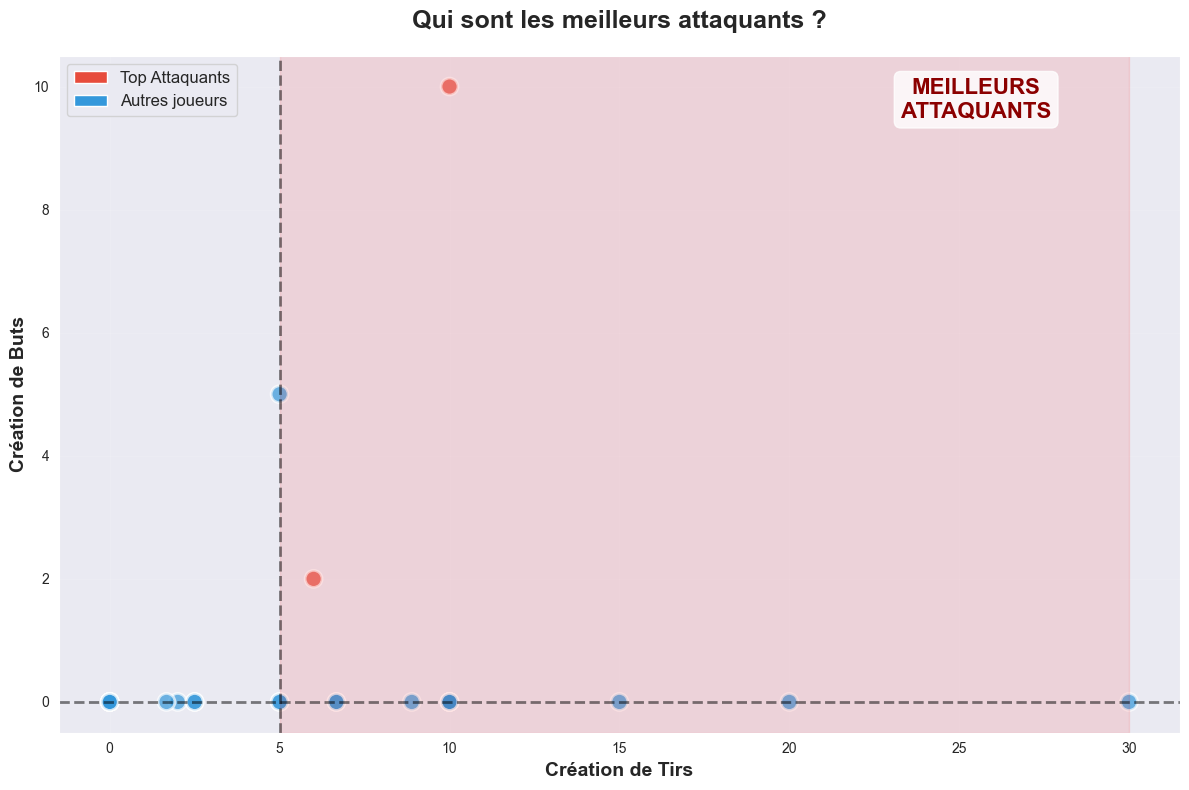


🎯 2 joueurs sont dans la zone rouge
   → Ils créent PLUS de tirs ET PLUS de buts que la moyenne


In [4]:
plt.figure(figsize=(12, 8))

# Filtrer les joueurs avec au moins 6 tirs
df_filtered = df[(df['Shots'] >= 6)].copy()

# Calculer les médianes
median_sca = df_filtered['SCA'].median()
median_gca = df_filtered['GCA'].median()

# Identifier les top attaquants
df_filtered['TopAttacker'] = np.where(
    (df_filtered['GCA'] > median_gca) &
    (df_filtered['SCA'] > median_sca), 1, 0
)

colors = ['#3498db' if x == 0 else '#e74c3c' for x in df_filtered['TopAttacker']]
plt.scatter(
    df_filtered['SCA'],
    df_filtered['GCA'],
    c=colors,
    s=150,
    alpha=0.7,
    edgecolors='white',
    linewidth=2
)

plt.axvline(median_sca, color='black', linestyle='--', linewidth=2, alpha=0.5)
plt.axhline(median_gca, color='black', linestyle='--', linewidth=2, alpha=0.5)

plt.axvspan(median_sca, df_filtered['SCA'].max(), median_gca, df_filtered['GCA'].max(),
            alpha=0.1, color='red')
plt.text(df_filtered['SCA'].max() * 0.85, df_filtered['GCA'].max() * 0.95,
         'MEILLEURS\nATTAQUANTS',
         fontsize=16, weight='bold', ha='center', color='darkred',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title('Qui sont les meilleurs attaquants ?', fontsize=18, weight='bold', pad=20)
plt.xlabel('Création de Tirs', fontsize=14, weight='bold')
plt.ylabel('Création de Buts', fontsize=14, weight='bold')

legend_elements = [
    Patch(facecolor='#e74c3c', label='Top Attaquants'),
    Patch(facecolor='#3498db', label='Autres joueurs')
]
plt.legend(handles=legend_elements, fontsize=12, loc='upper left', frameon=True)

plt.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print(f"🎯 {len(df_filtered[df_filtered['TopAttacker'] == 1])} joueurs sont dans la zone rouge")
print(f"   → Ils créent PLUS de tirs ET PLUS de buts que la moyenne")
print("=" * 60)

#### 2. **Influence sur la Variable Cible :**
L'analyse de l'importance des features (post-modélisation) est très claire : ce ne sont pas uniquement les buts qui discriminent nos classes. Les variables qui décrivent la progression du jeu sont primordiales.
- Les métriques comme SCA, Percussions_Progressives (CarProg) et les passes progressives sont en tête de liste. Elles possèdent la plus forte capacité discriminante pour le modèle KNN, ce qui signifie que ces actions sont déterminantes pour classer un joueur dans la catégorie "Top Attaquant".

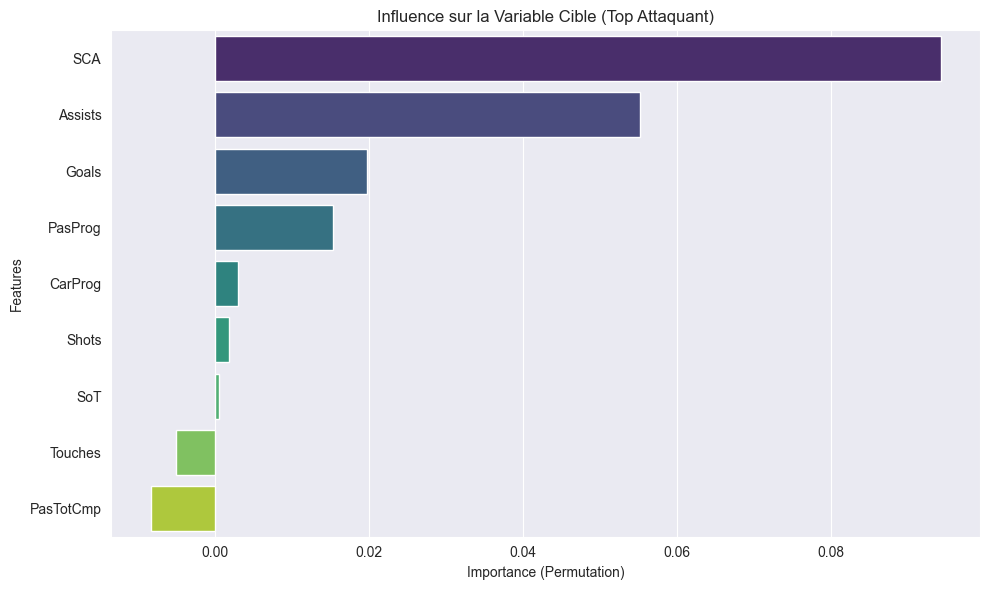

In [5]:
df['TopAttacker'] = ((df['GCA'] > df['GCA'].median()) & (df['SCA'] > df['SCA'].median())).astype(int)

features = ['Goals', 'SCA', 'CarProg', 'PasProg', 'Assists', 'Shots', 'SoT', 'PasTotCmp', 'Touches']
X = df[features]
y = df['TopAttacker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

results = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': results.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    palette='viridis',
    hue='Feature',
    legend=False
)
plt.title('Influence sur la Variable Cible (Top Attaquant)')
plt.xlabel('Importance (Permutation)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

#### 3. **Hypothèses et Tendances Graphiques :**
Notre première hypothèse est que le succès d'un attaquant est multifactoriel. La classification ne dépend pas d'un seul pic de statistique, mais d'une répartition équilibrée de la performance sur plusieurs axes (finition, création, progression).
- Si on regarde nos tendances visuelles le Quadrant Plot (Création vs. Finition) confirme cette hypothèse en regroupant nos meilleurs joueurs dans le quadrant de "Haute Création et Haute Efficacité". Ils sont à la fois créateurs et finisseurs.

- Le Radar Plot renforce cette idée en montrant que le profil moyen des "Top Finisseurs" présente une enveloppe statistique plus large et homogène sur toutes les features comparées aux autres joueurs.

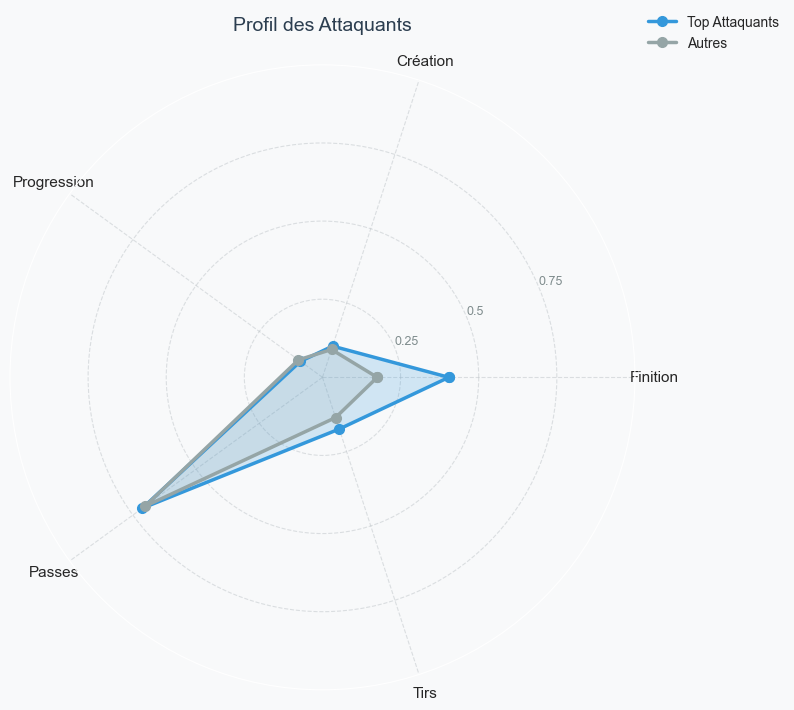

In [6]:
metrics_dict = {
    'Finition': 'G/SoT',
    'Création': 'SCA',
    'Progression': 'CarPrgDist',
    'Passes': 'PasTotCmp%',
    'Tirs': 'Shots'
}

# Filtrer attaquants
if 'Pos' in df.columns:
    df_att = df[df['Pos'].str.contains('FW', na=False)].copy()
else:
    df_att = df.copy()

# Nettoyer données
for col in metrics_dict.values():
    if col in df_att.columns:
        df_att[col] = pd.to_numeric(df_att[col], errors='coerce').fillna(0)

# Classifier (top 20%)
if 'Goals' in df_att.columns:
    seuil = df_att['Goals'].quantile(0.80)
    df_att['Groupe'] = df_att['Goals'].apply(
        lambda x: 'Top' if x >= seuil else 'Autres'
    )
else:
    df_att['Groupe'] = 'Tous'


# Normaliser
def norm(serie):
    return serie / serie.max() if serie.max() > 0 else serie


for nom, col in metrics_dict.items():
    if col in df_att.columns:
        df_att[f'{nom}_n'] = norm(df_att[col])

# Moyennes
top_moy = df_att[df_att['Groupe'] == 'Top'][[f'{m}_n' for m in metrics_dict]].mean()
autres_moy = df_att[df_att['Groupe'] == 'Autres'][[f'{m}_n' for m in metrics_dict]].mean()

# Radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'), facecolor='#f8f9fa')

cats = list(metrics_dict.keys())
N = len(cats)
angles = [n / N * 2 * pi for n in range(N)] + [0]

top_vals = [top_moy[f'{m}_n'] for m in cats] + [top_moy[f'{cats[0]}_n']]
autres_vals = [autres_moy[f'{m}_n'] for m in cats] + [autres_moy[f'{cats[0]}_n']]

ax.plot(angles, top_vals, 'o-', linewidth=2.5, label='Top Attaquants', color='#3498db', markersize=7)
ax.fill(angles, top_vals, alpha=0.2, color='#3498db')

ax.plot(angles, autres_vals, 'o-', linewidth=2.5, label='Autres', color='#95a5a6', markersize=7)
ax.fill(angles, autres_vals, alpha=0.15, color='#95a5a6')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(cats, fontsize=11)
ax.set_ylim(0, 1)
ax.set_yticks([0.25, 0.5, 0.75])
ax.set_yticklabels(['0.25', '0.5', '0.75'], fontsize=9, color='#7f8c8d')
ax.grid(True, linestyle='--', alpha=0.5, color='#bdc3c7')
ax.set_facecolor('#f8f9fa')

ax.set_title('Profil des Attaquants', fontsize=14, pad=25, color='#2c3e50')
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1), fontsize=10, frameon=False)

plt.tight_layout()
plt.show()